In [85]:
import rml
import matplotlib.pyplot    as plt
import numpy                as np
import warnings
warnings.filterwarnings("ignore")

In [86]:
pointcloud = np.loadtxt(open("eyeglasses_1.csv", "rb"), delimiter=",")  # 50 points sampled

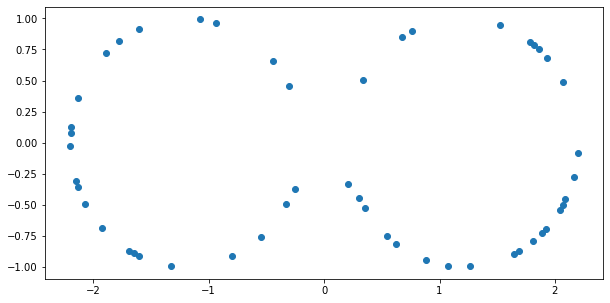

In [87]:
fig = plt.figure(figsize =(10,5))
plt.scatter(pointcloud[:,0], pointcloud[:,1])

In [90]:
S = rml.Simplex()
S.build_edges(pointcloud, k=10, threshold_var=0.08, edge_sen=0.1)

In [91]:
def plot_graph(pointcloud, edges, inds=None, marks=None):
    fig = plt.figure(figsize =(10,5))
    plt.scatter(pointcloud[:,0], pointcloud[:,1], alpha = 0.5)

    if marks!=None:
        for k in marks:
            plt.scatter(pointcloud[k,0], pointcloud[k,1], marker='x', color='red')
            plt.text(pointcloud[k,0]+.03, pointcloud[k,1]+.03, str(k), fontsize=9)
            
    if inds==None:
        inds = list(range(len(edges)))

    for j in inds:
        for i in edges[j]:
            plt.plot([pointcloud[inds[j]][0],pointcloud[i][0]], [pointcloud[inds[j]][1],pointcloud[i][1]])

We look at the edges for the 0th point.

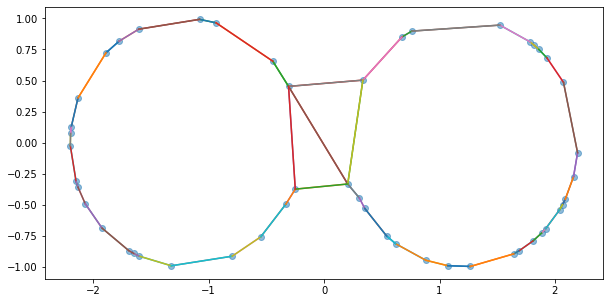

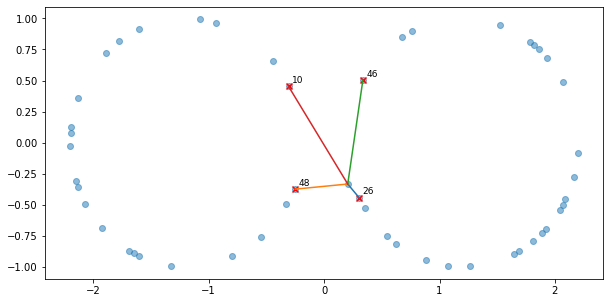

In [92]:
plot_graph(pointcloud, [S.vis[i][0]  for i in range(len(S.vis))])  # Plot of visible edges
plot_graph(pointcloud, [S.vis[i][0]  for i in [0]], [0], [26, 48, 46, 10]) # Plot of visible edges for the 0th point

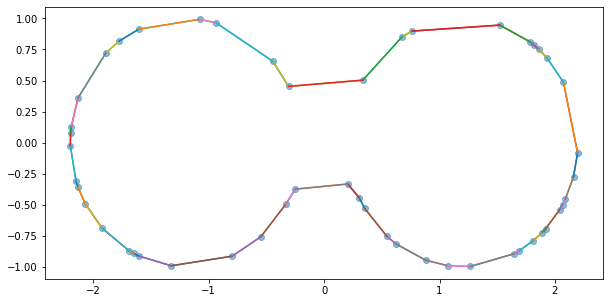

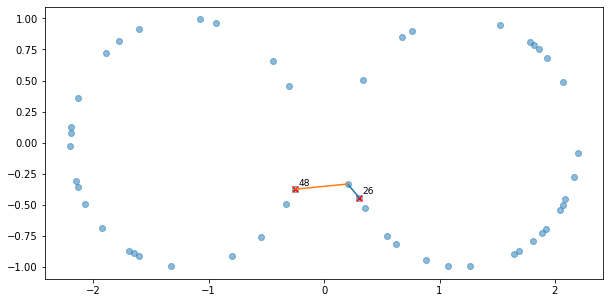

In [93]:
plot_graph(pointcloud, S.edges)  # Plot of safe edges with threshold_var=0.08, edge_sen=0.1
plot_graph(pointcloud, [S.edges[i]  for i in [0]], [0], [26, 48]) # Plot of safe edges for the 0th point

We see below that adding the extra edge to 46 (from `[26, 48]`) increases the local dimension estimated by PCA to 2 and by `edge_sen=0.1`, we discard this point as well as the others in the list which give even longer edges.

In [94]:
i = 0
print(S.vis[i])  # visible edges from the 0th point
print(S.dims[i])  # local dimension
print(S.vars[i])  # explained variance ratio from PCA when adding edges

(array([26, 48, 46, 10]), array([0.14982042, 0.45641988, 0.84706853, 0.93887795]))
[1 2]
[array([1.0000000e+00, 1.1639186e-34]), array([0.80902059, 0.19097941])]


However with different parameters, we fail to correctly identify the correct structure of the eyeglasses

In [97]:
S1 = rml.Simplex()
S1.build_edges(pointcloud, k=10, threshold_var=0.08, edge_sen=0.3)

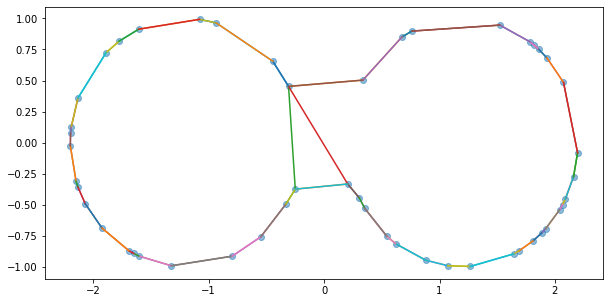

In [108]:
plot_graph(pointcloud, S1.edges)  # Plot of safe edges with threshold_var=0.08, edge_sen=0.3

This is probably less likely with more sampled points. Try it below.

In [105]:
import random
eyeglasses = np.loadtxt('eyeglasses_tight.txt')
pointcloud_100 = np.array(random.sample(list(eyeglasses), 120))

In [106]:
S2 = rml.Simplex()
S2.build_edges(pointcloud_100, k=10, threshold_var=0.08, edge_sen=0.3)

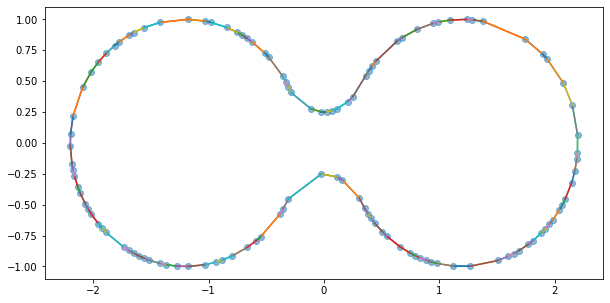

In [107]:
plot_graph(pointcloud_100, S2.edges)  # Plot of safe edges with threshold_var=0.08, edge_sen=0.2